In [1]:
import pandas as pd

In [2]:
import unicodedata

def remover_acentos(texto):
    """Remove acentos de uma string."""
    normalizado = unicodedata.normalize('NFKD', texto)
    sem_acentos = ''.join([c for c in normalizado if not unicodedata.combining(c)])
    return sem_acentos

In [3]:
df_obitos_arma_fogo = pd.read_csv(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\obitos_datasus.csv')

In [4]:
df_populacao = pd.read_excel(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\raw\estimativa_dou_2024.xls', sheet_name='MUNICÍPIOS', skiprows=1, skipfooter=1)
df_populacao['NOME DO MUNICÍPIO'] = df_populacao['NOME DO MUNICÍPIO'].astype(str).apply(remover_acentos)
df_populacao['chave'] = df_populacao['UF'] + df_populacao['NOME DO MUNICÍPIO'].str.lower()
df_populacao

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,chave
0,RO,11.0,15.0,Alta Floresta D'Oeste,22853.0,ROalta floresta d'oeste
1,RO,11.0,23.0,Ariquemes,108573.0,ROariquemes
2,RO,11.0,31.0,Cabixi,5690.0,ROcabixi
3,RO,11.0,49.0,Cacoal,97637.0,ROcacoal
4,RO,11.0,56.0,Cerejeiras,16975.0,ROcerejeiras
...,...,...,...,...,...,...
5566,GO,52.0,22054.0,Vicentinopolis,9077.0,GOvicentinopolis
5567,GO,52.0,22203.0,Vila Boa,4185.0,GOvila boa
5568,GO,52.0,22302.0,Vila Propicio,5982.0,GOvila propicio
5569,DF,53.0,108.0,Brasilia,2982818.0,DFbrasilia


In [5]:
df = pd.read_parquet(r'C:\Users\daviw\OneDrive\Projetos\Python\Segurança Pública\data\processed\df_unificado.parquet')

def formatar_municipio(municipio):
    """Formata o nome do município."""
    if municipio == 'NÃO INFORMADO':
        return 'NÃO INFORMADO'
    elif pd.isna(municipio): #verifica se é nulo
        return 'NÃO INFORMADO' #trata nulos como 'Não informado'
    else:
        return municipio.lower()

df['municipio'] = df['municipio'].apply(formatar_municipio)

df['municipio'] = df['municipio'].apply(remover_acentos)

df['chave_uf'] = df['uf'] + df['municipio']



df

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,...,abrangencia,formulario,total_vitimas,total_vitima,qtde_vitimas,ano,chave,valor,categoria,chave_uf
0,AC,NAO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,AC2015,0.000,Apreensão de Cocaína,ACNAO INFORMADO
1,AL,NAO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,AL2015,19.890,Apreensão de Cocaína,ALNAO INFORMADO
2,AM,NAO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,AM2015,40.660,Apreensão de Cocaína,AMNAO INFORMADO
3,AP,NAO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,AP2015,0.127,Apreensão de Cocaína,APNAO INFORMADO
4,BA,NAO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,BA2015,16.100,Apreensão de Cocaína,BANAO INFORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113284,RS,NAO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,RS2024,1208.000,Tráfico de drogas,RSNAO INFORMADO
6113285,SC,NAO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,SC2024,447.000,Tráfico de drogas,SCNAO INFORMADO
6113286,SE,NAO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,SE2024,118.000,Tráfico de drogas,SENAO INFORMADO
6113287,SP,NAO INFORMADO,Tráfico de drogas,2024-12-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,SP2024,0.000,Tráfico de drogas,SPNAO INFORMADO


In [6]:
df_RJ = df[df['uf'] == 'RJ'].reset_index(drop=True)
df_RJ

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,...,abrangencia,formulario,total_vitimas,total_vitima,qtde_vitimas,ano,chave,valor,categoria,chave_uf
0,RJ,NAO INFORMADO,Apreensão de Cocaína,2015-01-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,RJ2015,0.0,Apreensão de Cocaína,RJNAO INFORMADO
1,RJ,NAO INFORMADO,Apreensão de Cocaína,2015-02-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,RJ2015,0.0,Apreensão de Cocaína,RJNAO INFORMADO
2,RJ,NAO INFORMADO,Apreensão de Cocaína,2015-03-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,RJ2015,0.0,Apreensão de Cocaína,RJNAO INFORMADO
3,RJ,NAO INFORMADO,Apreensão de Cocaína,2015-04-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,RJ2015,0.0,Apreensão de Cocaína,RJNAO INFORMADO
4,RJ,NAO INFORMADO,Apreensão de Cocaína,2015-05-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 5,NaN,NaN,0.0,2015,RJ2015,0.0,Apreensão de Cocaína,RJNAO INFORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105191,RJ,NAO INFORMADO,Tráfico de drogas,2024-07-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,RJ2024,1904.0,Tráfico de drogas,RJNAO INFORMADO
105192,RJ,NAO INFORMADO,Tráfico de drogas,2024-08-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,RJ2024,1794.0,Tráfico de drogas,RJNAO INFORMADO
105193,RJ,NAO INFORMADO,Tráfico de drogas,2024-09-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,RJ2024,1651.0,Tráfico de drogas,RJNAO INFORMADO
105194,RJ,NAO INFORMADO,Tráfico de drogas,2024-10-01,None,None,None,NaN,NaN,NaN,...,Estadual,Formulário 4,NaN,NaN,0.0,2024,RJ2024,1583.0,Tráfico de drogas,RJNAO INFORMADO


In [32]:
df_RJ_c_mun = df_RJ[df_RJ['municipio'] != 'NAO INFORMADO'].reset_index(drop=True)
df_RJ_c_mun = df_RJ_c_mun[df_RJ_c_mun['ano'] == 2023]
df_RJ_c_mun['populacao'] = df_RJ_c_mun['chave_uf'].map(df_populacao.set_index('chave')['POPULAÇÃO ESTIMADA'])
df_RJ_c_mun['obitos'] = df_RJ_c_mun['chave_uf'].map(df_obitos_arma_fogo.set_index('chave_uf')['obitos'])
df_RJ_c_mun['chave_agrupamento'] = df_RJ_c_mun['uf'] + "," + df_RJ_c_mun['municipio'] + "," + df_RJ_c_mun['evento'] + "," + df_RJ_c_mun['ano'].astype(str) + "," + df_RJ_c_mun['categoria']
df_RJ_c_mun



,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,...,total_vitima,qtde_vitimas,ano,chave,valor,categoria,chave_uf,populacao,obitos,chave_agrupamento
79488,RJ,angra dos reis,Feminicídio,2023-01-01,None,None,None,1.0,0.0,0.0,...,NaN,1.0,2023,RJ2023,1.0,Crimes Contra a Vida,RJangra dos reis,179120.0,89.0,"RJ,angra dos reis,Feminicídio,2023,Crimes Cont..."
79489,RJ,aperibe,Feminicídio,2023-01-01,None,None,None,0.0,0.0,0.0,...,NaN,0.0,2023,RJ2023,0.0,Crimes Contra a Vida,RJaperibe,11420.0,2.0,"RJ,aperibe,Feminicídio,2023,Crimes Contra a Vida"
79490,RJ,araruama,Feminicídio,2023-01-01,None,None,None,0.0,0.0,0.0,...,NaN,0.0,2023,RJ2023,0.0,Crimes Contra a Vida,RJararuama,137773.0,42.0,"RJ,araruama,Feminicídio,2023,Crimes Contra a Vida"
79491,RJ,areal,Feminicídio,2023-01-01,None,None,None,0.0,0.0,0.0,...,NaN,0.0,2023,RJ2023,0.0,Crimes Contra a Vida,RJareal,12236.0,1.0,"RJ,areal,Feminicídio,2023,Crimes Contra a Vida"
79492,RJ,armacao dos buzios,Feminicídio,2023-01-01,None,None,None,0.0,0.0,0.0,...,NaN,0.0,2023,RJ2023,0.0,Crimes Contra a Vida,RJarmacao dos buzios,42442.0,5.0,"RJ,armacao dos buzios,Feminicídio,2023,Crimes ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89419,RJ,tres rios,Tentativa de homicídio,2023-12-01,None,None,None,1.0,1.0,0.0,...,NaN,2.0,2023,RJ2023,2.0,Tentativa de homicídio,RJtres rios,82300.0,12.0,"RJ,tres rios,Tentativa de homicídio,2023,Tenta..."
89420,RJ,valenca,Tentativa de homicídio,2023-12-01,None,None,None,0.0,1.0,0.0,...,NaN,1.0,2023,RJ2023,1.0,Tentativa de homicídio,RJvalenca,71462.0,8.0,"RJ,valenca,Tentativa de homicídio,2023,Tentati..."
89421,RJ,varre-sai,Tentativa de homicídio,2023-12-01,None,None,None,0.0,0.0,0.0,...,NaN,0.0,2023,RJ2023,0.0,Tentativa de homicídio,RJvarre-sai,10559.0,NaN,"RJ,varre-sai,Tentativa de homicídio,2023,Tenta..."
89422,RJ,vassouras,Tentativa de homicídio,2023-12-01,None,None,None,0.0,0.0,0.0,...,NaN,0.0,2023,RJ2023,0.0,Tentativa de homicídio,RJvassouras,35904.0,3.0,"RJ,vassouras,Tentativa de homicídio,2023,Tenta..."


In [65]:
agrupamento_valor = df_RJ_c_mun.groupby('chave_agrupamento')['valor'].sum().reset_index()
agrupamento_obitos = df_RJ_c_mun.groupby('chave_agrupamento')['obitos'].min().reset_index()
agrupamento_populacao = df_RJ_c_mun.groupby('chave_agrupamento')['populacao'].min().reset_index()

# Mesclar agrupamento_valor e agrupamento_obitos
df_agrupado = agrupamento_valor.merge(agrupamento_obitos, on="chave_agrupamento")

# Mesclar o resultado com agrupamento_populacao
df_agrupado = df_agrupado.merge(agrupamento_populacao, on="chave_agrupamento")

df_agrupado['tx_100_mil_hab'] = df_agrupado['valor'] / df_agrupado['populacao'] * 100000

df_agrupado['obitos_100_mil_hab'] = df_agrupado['obitos'] / df_agrupado['populacao'] * 100000

df_agrupado

,chave_agrupamento,valor,obitos,populacao,tx_100_mil_hab,obitos_100_mil_hab
0,"RJ,angra dos reis,Feminicídio,2023,Crimes Cont...",2.0,89.0,179120.0,1.116570,49.68736
1,"RJ,angra dos reis,Homicídio doloso,2023,Crimes...",46.0,89.0,179120.0,25.681108,49.68736
2,"RJ,angra dos reis,Lesão corporal seguida de mo...",0.0,89.0,179120.0,0.000000,49.68736
3,"RJ,angra dos reis,Mandado de prisão cumprido,2...",236.0,89.0,179120.0,131.755248,49.68736
4,"RJ,angra dos reis,Morte no trânsito ou em deco...",36.0,89.0,179120.0,20.098258,49.68736
...,...,...,...,...,...,...
823,"RJ,volta redonda,Morte no trânsito ou em decor...",32.0,50.0,279898.0,11.432736,17.86365
824,"RJ,volta redonda,Mortes a esclarecer (sem indí...",45.0,50.0,279898.0,16.077285,17.86365
825,"RJ,volta redonda,Roubo seguido de morte (latro...",1.0,50.0,279898.0,0.357273,17.86365
826,"RJ,volta redonda,Suicídio,2023,Ocorrências não...",14.0,50.0,279898.0,5.001822,17.86365


In [67]:
# Separar a coluna 'chave_agrupamento' em múltiplas colunas
df_expandido = df_agrupado.copy()
df_expandido[['estado', 'municipio', 'crime', 'ano', 'categoria']] = df_expandido['chave_agrupamento'].str.split(',', expand=True)

# Remover a coluna original, se necessário
df_expandido = df_expandido.drop(columns=['chave_agrupamento'])

# Reordenar as colunas, se desejado
df_expandido = df_expandido[['estado', 'municipio', 'crime', 'ano', 'categoria', 'valor', 'obitos', 'populacao', 'tx_100_mil_hab', 'obitos_100_mil_hab']]

# Exibir o resultado
df_expandido.head()


,estado,municipio,crime,ano,categoria,valor,obitos,populacao,tx_100_mil_hab,obitos_100_mil_hab
0,RJ,angra dos reis,Feminicídio,2023,Crimes Contra a Vida,2.0,89.0,179120.0,1.116570,49.68736
1,RJ,angra dos reis,Homicídio doloso,2023,Crimes Contra a Vida,46.0,89.0,179120.0,25.681108,49.68736
2,RJ,angra dos reis,Lesão corporal seguida de morte,2023,Crimes Contra a Vida,0.0,89.0,179120.0,0.000000,49.68736
3,RJ,angra dos reis,Mandado de prisão cumprido,2023,Ocorrências não violentas,236.0,89.0,179120.0,131.755248,49.68736
4,RJ,angra dos reis,Morte no trânsito ou em decorrência dele (exce...,2023,Morte no trânsito ou em decorrência dele (exce...,36.0,89.0,179120.0,20.098258,49.68736


In [68]:
df_RJ_mun_100k = df_expandido[(df_expandido['populacao'] > 100000)].reset_index(drop=True)
df_RJ_mun_100k

,estado,municipio,crime,ano,categoria,valor,obitos,populacao,tx_100_mil_hab,obitos_100_mil_hab
0,RJ,angra dos reis,Feminicídio,2023,Crimes Contra a Vida,2.0,89.0,179120.0,1.116570,49.68736
1,RJ,angra dos reis,Homicídio doloso,2023,Crimes Contra a Vida,46.0,89.0,179120.0,25.681108,49.68736
2,RJ,angra dos reis,Lesão corporal seguida de morte,2023,Crimes Contra a Vida,0.0,89.0,179120.0,0.000000,49.68736
3,RJ,angra dos reis,Mandado de prisão cumprido,2023,Ocorrências não violentas,236.0,89.0,179120.0,131.755248,49.68736
4,RJ,angra dos reis,Morte no trânsito ou em decorrência dele (exce...,2023,Morte no trânsito ou em decorrência dele (exce...,36.0,89.0,179120.0,20.098258,49.68736
...,...,...,...,...,...,...,...,...,...,...
256,RJ,volta redonda,Morte no trânsito ou em decorrência dele (exce...,2023,Morte no trânsito ou em decorrência dele (exce...,32.0,50.0,279898.0,11.432736,17.86365
257,RJ,volta redonda,Mortes a esclarecer (sem indício de crime),2023,Mortes a esclarecer (sem indício de crime),45.0,50.0,279898.0,16.077285,17.86365
258,RJ,volta redonda,Roubo seguido de morte (latrocínio),2023,Crimes Contra a Vida,1.0,50.0,279898.0,0.357273,17.86365
259,RJ,volta redonda,Suicídio,2023,Ocorrências não violentas,14.0,50.0,279898.0,5.001822,17.86365


In [69]:
# Dos eventos com município informado, os que tem maior correlação com tráfico de drogas são :
#  - Morte no trânsito ou em decorrência dele (exceto homicídio doloso)
#  - Tentativa de homicídio

vars_selecionadas = {}

tent_hom = df_RJ_mun_100k[df_RJ_mun_100k['categoria'] == 'Tentativa de homicídio'].groupby('municipio')['tx_100_mil_hab'].sum().sort_values(ascending=True)
morte_transito = df_RJ_mun_100k[df_RJ_mun_100k['categoria'] == 'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)'].groupby('municipio')['tx_100_mil_hab'].sum().sort_values(ascending=True)
Crimes_Contra_a_Vida = df_RJ_mun_100k[df_RJ_mun_100k['categoria'] == 'Crimes Contra a Vida'].groupby('municipio')['tx_100_mil_hab'].sum().sort_values(ascending=True)
mortes_por_arma_de_fogo = df_RJ_mun_100k.groupby('municipio')['obitos_100_mil_hab'].mean().sort_values(ascending=True)


vars_selecionadas['Tentativa de homicídio'] = tent_hom
vars_selecionadas['Morte no trânsito ou em decorrência dele (exceto homicídio doloso)'] = morte_transito
vars_selecionadas['Crimes Contra a Vida'] = Crimes_Contra_a_Vida
vars_selecionadas['mortes_por_arma_de_fogo'] = mortes_por_arma_de_fogo

vars_selecionadas
df_variaveis_selecionadas = pd.DataFrame(vars_selecionadas)
df_variaveis_selecionadas.sort_values(by='Tentativa de homicídio', ascending=True)

,Tentativa de homicídio,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Crimes Contra a Vida,mortes_por_arma_de_fogo
municipio,,,,
nova friburgo,5.901794,13.279037,16.229934,5.901794
mesquita,10.626220,6.711297,12.863319,9.507670
itaborai,10.831528,21.663056,32.077987,29.578404
petropolis,11.526088,7.458057,13.221101,6.102047
nilopolis,11.572288,5.143239,8.357764,3.857429
sao goncalo,13.011996,13.011996,15.822587,12.179228
rio de janeiro,13.150281,9.019459,17.949763,11.753528
nova iguacu,15.301656,9.370782,27.993728,23.130410
niteroi,16.062858,11.031119,9.095835,6.386438


In [80]:
df_variaveis_selecionadas.corr()

,Tentativa de homicídio,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Crimes Contra a Vida,mortes_por_arma_de_fogo
Tentativa de homicídio,1.000000,0.203622,0.486880,0.657158
Morte no trânsito ou em decorrência dele (exceto homicídio doloso),0.203622,1.000000,0.342770,0.360691
Crimes Contra a Vida,0.486880,0.342770,1.000000,0.786134
mortes_por_arma_de_fogo,0.657158,0.360691,0.786134,1.000000


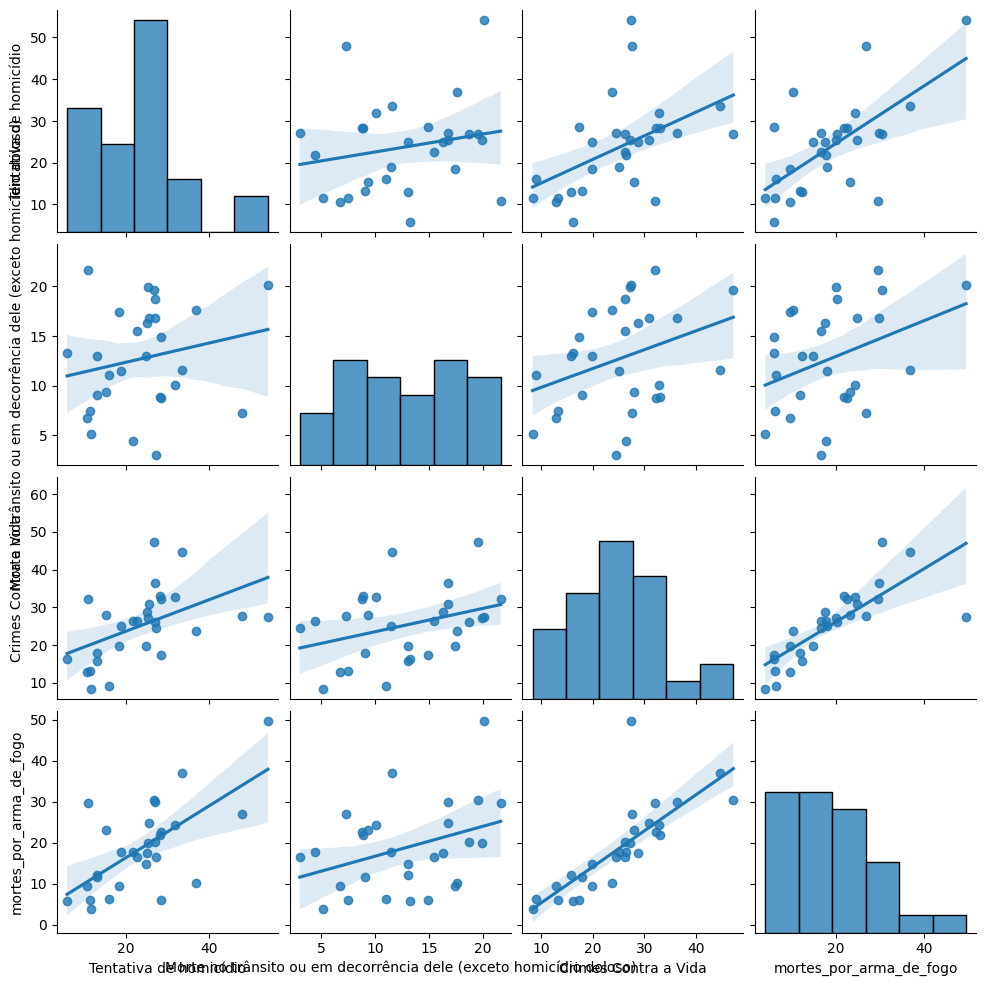

In [79]:
sns.pairplot(df_variaveis_selecionadas, kind='reg')

<Axes: xlabel='Tentativa de homicídio', ylabel='mortes_por_arma_de_fogo'>

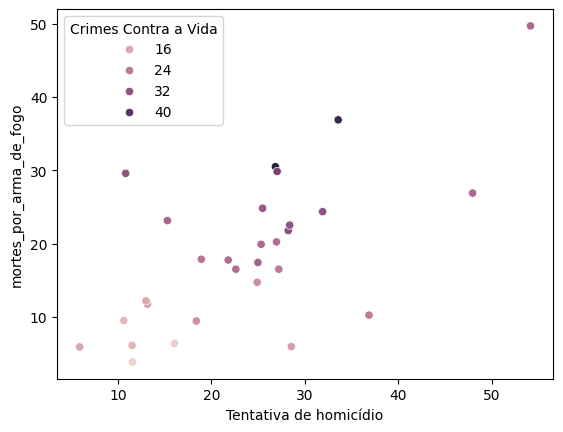

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_variaveis_selecionadas, 
x='Tentativa de homicídio', 
y='mortes_por_arma_de_fogo', 
hue='Crimes Contra a Vida')

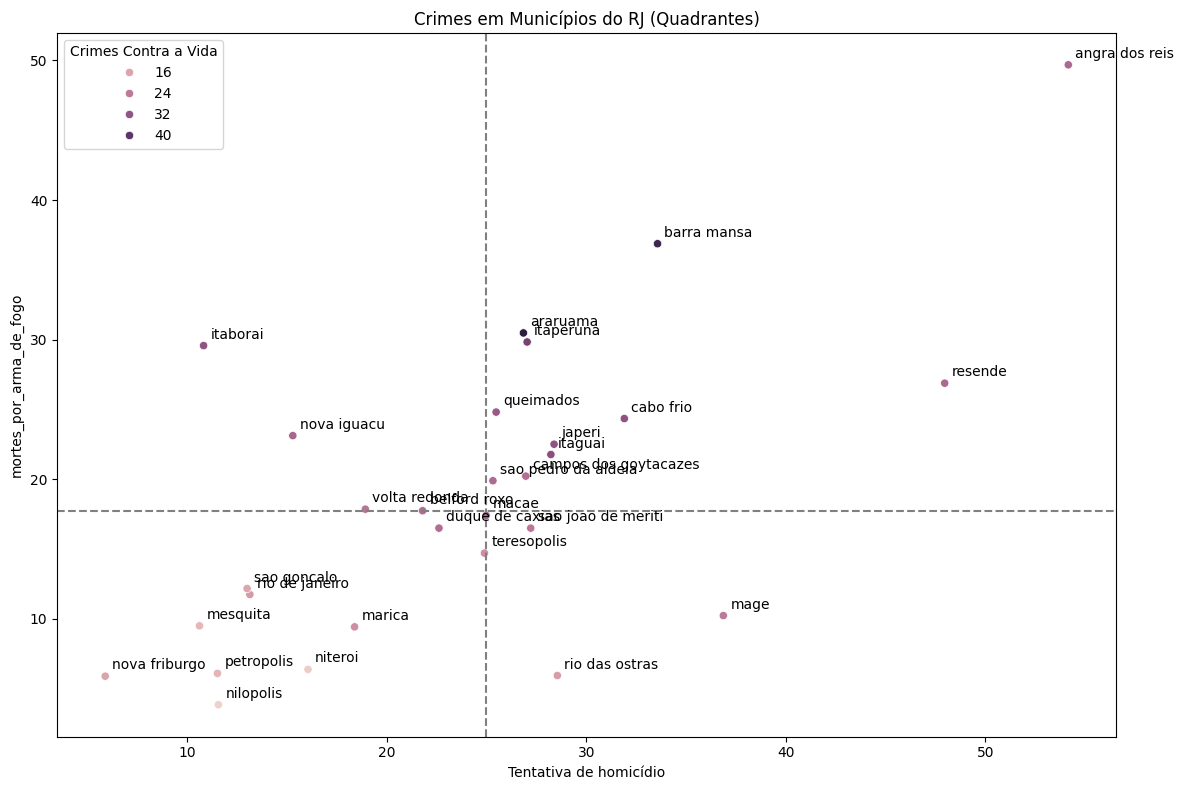

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Crie o scatterplot com Seaborn
ax = sns.scatterplot(
    data=df_variaveis_selecionadas,
    x='Tentativa de homicídio',
    y='mortes_por_arma_de_fogo',
    hue='Crimes Contra a Vida'
)

# Calcule os valores médios para definir os quadrantes
media_x = df_variaveis_selecionadas['Tentativa de homicídio'].quantile(0.5)
media_y = df_variaveis_selecionadas['mortes_por_arma_de_fogo'].quantile(0.5)

# Desenhe as linhas dos quadrantes
ax.axvline(media_x, color='gray', linestyle='--')
ax.axhline(media_y, color='gray', linestyle='--')

# Adicione anotações usando o índice (nome do município)
for idx, row in df_variaveis_selecionadas.iterrows():
    ax.annotate(
        idx,
        (row['Tentativa de homicídio'], row['mortes_por_arma_de_fogo']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left'
    )

plt.title('Crimes em Municípios do RJ (Quadrantes)')
plt.xlabel('Tentativa de homicídio')
plt.ylabel('mortes_por_arma_de_fogo')
plt.legend(title='Crimes Contra a Vida')
plt.tight_layout()
plt.show()